In [1]:
from ugropy import abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(1, 220, 220, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [3]:
for idx, smiles in enumerate(df.index):
    solution = abdulelah_gani_p.get_groups(smiles, "smiles", search_multiple_solutions=True)
    
    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles][df.loc[smiles] != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()

    # Verificar si ninguna solución tiene subgroups_numbers igual a row_dict
    if all([sol.subgroups_numbers != row_dict for sol in solution]):
        print(smiles)
        print(idx)
        print("Subgrupos:")
        print("\n".join(str(sol.subgroups) for sol in solution))  # Convertir a string y unir con saltos de línea
        print("Subgrupos por número:")
        print("\n".join(str(sol.subgroups_numbers) for sol in solution))  # Convertir a string y unir con saltos de línea
        print("Gani: ")
        print(row_dict)
        
        wrong_smiles = smiles
        break


CC(C)(C)c1ccc(cc1)C2=Nc3ncccc3N2
669
Subgrupos:
{'CH3': 3, 'aCH': 4, 'aC except as above': 1, 'aC-C': 1, 'CH=CH (cyclic)': 1, 'CH=C (cyclic)': 1, 'NH (cyclic)': 1, 'C=N (cyclic)': 2}
Subgrupos por número:
{1: 3, 15: 4, 18: 1, 23: 1, 171: 1, 172: 1, 175: 1, 178: 2}
Gani: 
{1: 3, 15: 7, 17: 2, 18: 1, 19: 1, 23: 1, 175: 1, 178: 1}


In [4]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

abdulelah_gani_p.detect_fragments(mol)


{'CH3_0': (0,),
 'CH3_1': (2,),
 'CH3_2': (3,),
 'C_0': (1,),
 'aCH_0': (5,),
 'aCH_1': (6,),
 'aCH_2': (8,),
 'aCH_3': (9,),
 'aC except as above_0': (4,),
 'aC except as above_1': (7,),
 'aC-C_0': (4, 1),
 'CH=CH (cyclic)_0': (14, 15),
 'CH=C (cyclic)_0': (16, 17),
 'NH (cyclic)_0': (18,),
 'N (cyclic)_0': (11,),
 'N (cyclic)_1': (13,),
 'C=N (cyclic)_0': (10, 11),
 'C=N (cyclic)_1': (12, 13)}

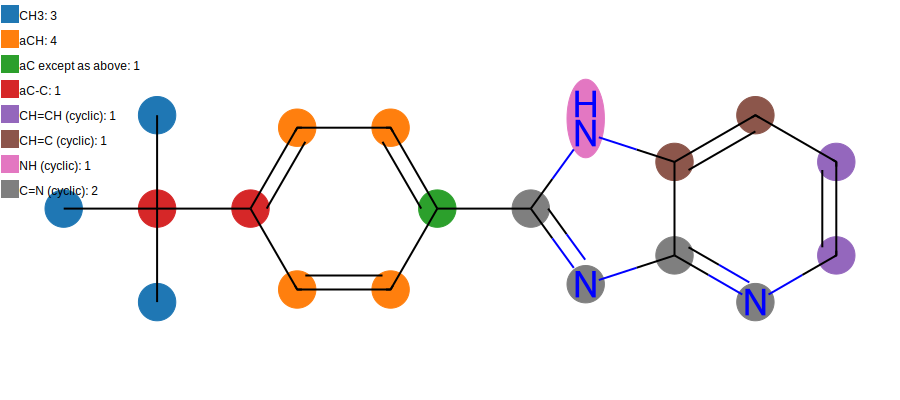

In [5]:
sol = abdulelah_gani_p.get_groups(wrong_smiles, "smiles")

sol.draw(width=900, height=400)

In [6]:
sols = abdulelah_gani_p.get_groups(wrong_smiles, "smiles", search_multiple_solutions=True)

for sol in sols:
    print(sol.subgroups_numbers)

{1: 3, 15: 4, 18: 1, 23: 1, 171: 1, 172: 1, 175: 1, 178: 2}


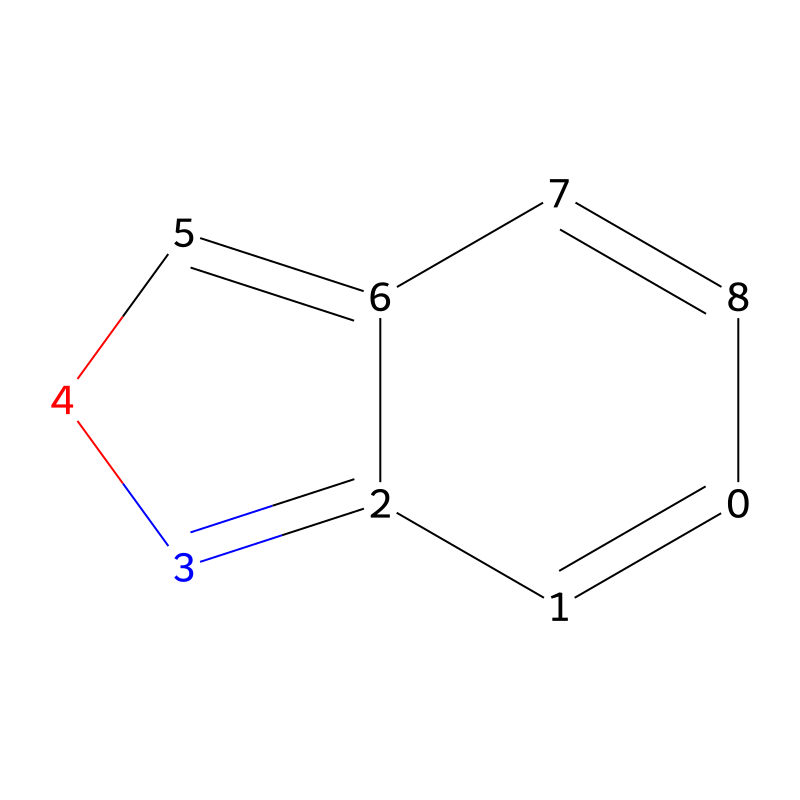

In [7]:
smiles = "C1=CC2=NOC=C2C=C1"

mol = instantiate_mol_object(smiles, "smiles")
mol = abdulelah_gani_p.mol_preprocess(mol)

# Configurar etiquetas personalizadas para mostrar los índices de los átomos
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

# Dibujar la molécula con los índices
img = Draw.MolToImage(mol, size=(800, 800))

img

In [8]:
smt = Chem.MolFromSmarts("[cH0;$([cH0;R2,R3]([a;R2,R3]([a;R])[A;R])([a;R])[a;R]),$([cH0;R2,R3]([a;R2,R3]([a;R])[a;R])([a;R])[A;R]),$([cH0;R2,R3]([a;R2,R3]([a;R])[A;R])([a;R])[A;R])]")

mol.GetSubstructMatches(smt)

()

In [9]:
df[df[88]>0]

,1,2,3,4,5,6,7,8,9,10,...,211,212,213,214,215,216,217,218,219,220
SMILES,,,,,,,,,,,,,,,,,,,,,
C=CC(=O)NCCC1=NC=NC1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CC(=O)NCCCN(C)C,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CC(=O)NCCCN(CC)CC,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CC(=O)NCCCN1CCOCC1,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CC(=O)NCCCN1CCSCC1,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCCNC(=O)CCN1C=CN=C1N(=O)=O,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OCCNC(=O)CCN1C=NC(=N1)N(=O)=O,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OCCNC(=O)CN1C=CN=C1N(=O)=O,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


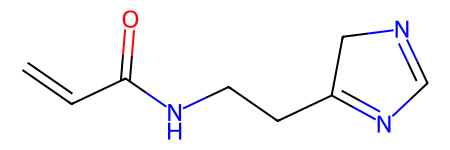

In [10]:
smiles = "C=CC(=O)NCCC1=NC=NC1"

mol = instantiate_mol_object(smiles, "smiles")

mol